In [711]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.express as px
from sklearn.datasets import load_iris
import warnings

In [713]:
plt.style.use("dark_background")
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action = 'ignore')

In [353]:
data = load_iris()

In [354]:
df = pd.DataFrame(data.data, columns = data.feature_names)

df['target'] = data.target

In [355]:
df = df[df['target'] != 2] #이진분류로 할 것이니 종이 setosa , versicolor 인 것만 사용하도록 하자 

# 로지스틱 회귀분석 개요 

### 로지스틱 회귀분석은 이진 분류기의 일종으로 target 변수를 feature 변수 간 가중치를 준 선형 결합의 스칼라 값을 
### 시그모이드 함수에 대입하여 일정 임계점을 기준으로 분류하는 것이다.

* 왜 시그모이드 함수를 사용해야 하는가 ? 선형 방정식으로는 알 수 없을까 ? 
* 예시를 들어 설명하겠다. 임의의 데이터 셋을 생성 

# 임의의 데이터를 가정해보자 

* X 는 -3~3 사이의 임의의 실수이고 
* Y 는 절편이 2 이고, 기울기가 5 인 가중치를 가지고 약간의 오차항과 , X 와 선형적인 모습을 가진 실제 데이터이다. 
* 다만 선형 회귀 분석과 다른 점은 target 데이터가 0 아니면 1이란 것인데, 여기서는 조건이 0보다 큰 경우엔 1, 작은 경우엔 0으로 했다.

In [685]:
X = np.arange(-3,3,0.1).reshape(-1,1)
Y = (5 + 12 * X + 3 * np.random.random(size = [len(X),1])>0).astype(int)

Text(0, 0.5, 'Y')

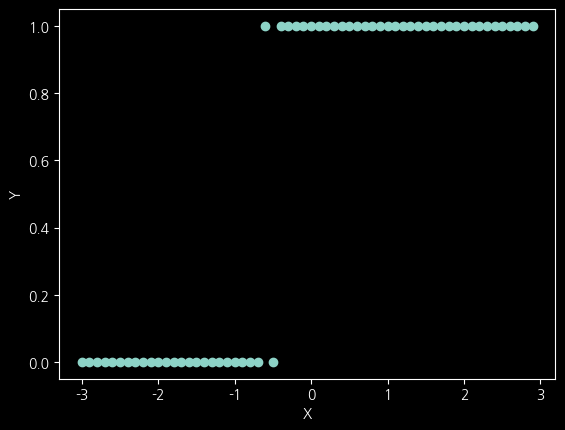

In [686]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

# X와 Y 축 데이터를 선형 회귀 분석처럼 가장 설명력이 강한 직선을 그은 후 
# 그 직선의 값으로 예측 할 순 없을까?

In [687]:
Y_hat = 2 + 5 * X

* 가중치 값을 완벽하게 알아서, 선형적인 회귀 분석 모델을 만들었다고 가정해보자 

Text(0.5, 1.0, '직선의 정의역은 0과 1사이가 아니라 \n -무한대~무한대')

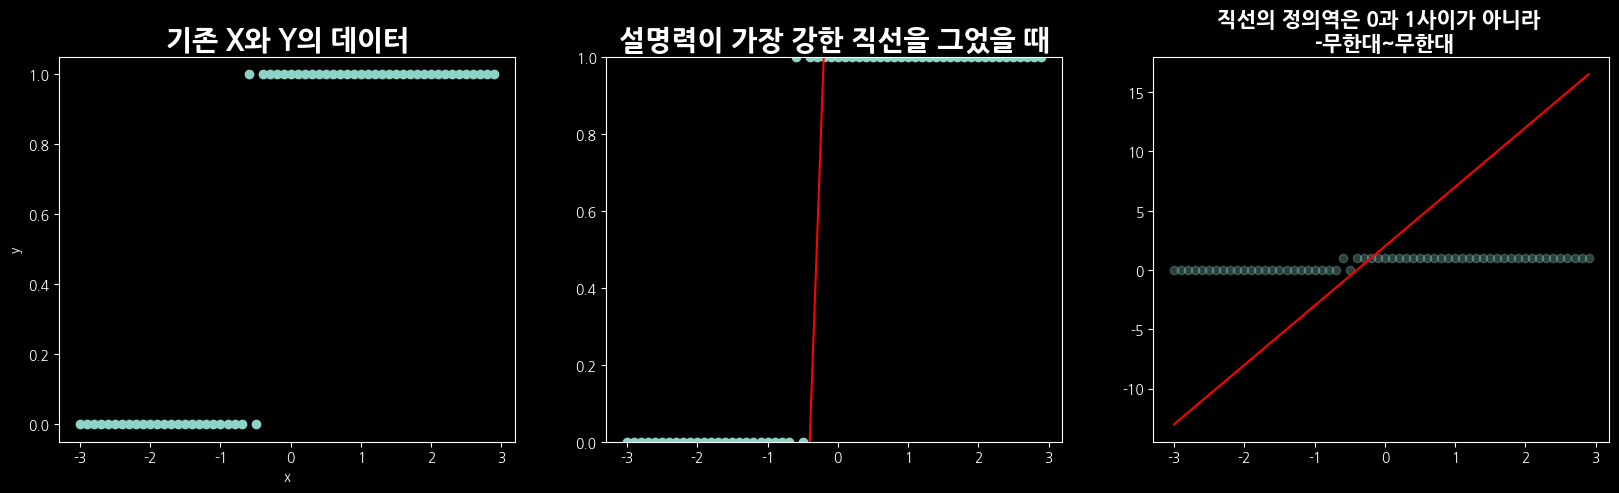

In [856]:
fig = plt.figure(figsize = [20,5])

ax1 = fig.add_subplot(1,3,1)
ax1.scatter(X,Y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('기존 X와 Y의 데이터',size = 20,weight = 'bold')

ax2 = fig.add_subplot(1,3,2)

ax2.scatter(X,Y)
ax2.plot(X,Y_hat,c = 'red')
ax2.set_ylim([0,1])
ax2.set_title('설명력이 가장 강한 직선을 그었을 때',size = 20, weight = 'bold')

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(X,Y,alpha = 0.3)
ax3.plot(X,Y_hat, c = 'red')
ax3.set_title('직선의 정의역은 0과 1사이가 아니라 \n -무한대~무한대',size = 15, weight = 'bold')

* X 값은 - 무한대부터 + 무한대까지 어떠한 값을 가지든 Y 값은 0 아니면 1인데 선형적인 모델로 예측 하게 된다면
* Y가 가질 수 있는 값은 - 무한대~ + 무한대 이므로 Y값을 예측 하는 것이 불가능하다. 
* 그렇기 때문에 우리는 시그모이드 함수를 이용한다.

In [689]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Text(0.5, 1.0, '시그모이드 함수의 정의역은 0과 1 사이')

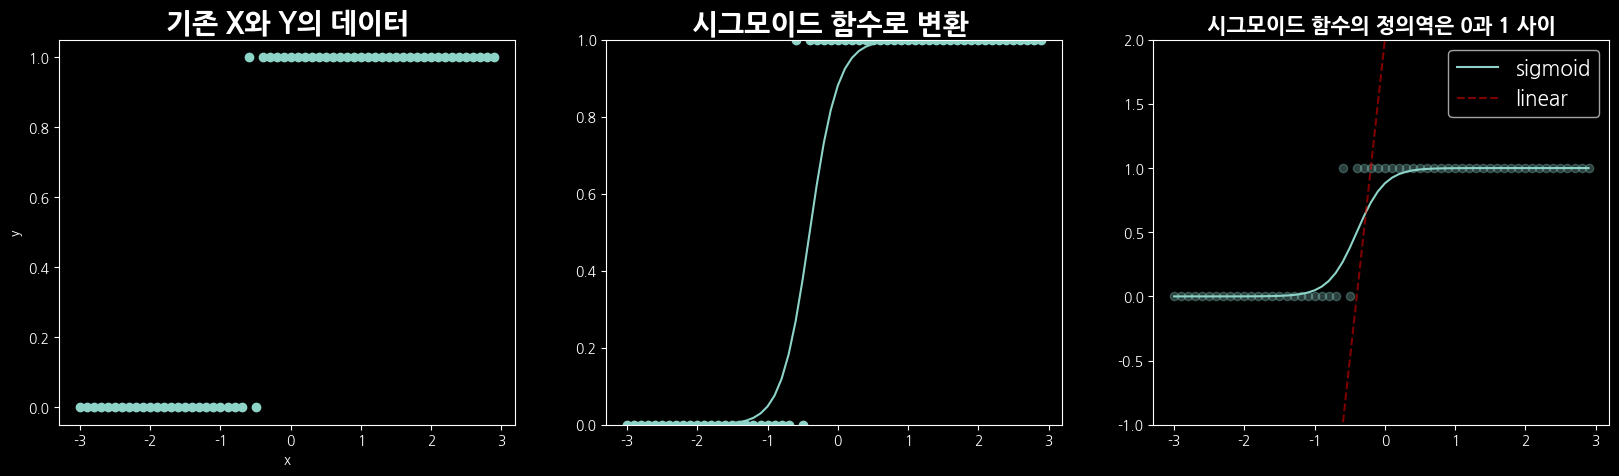

In [690]:
fig = plt.figure(figsize = [20,5])

ax1 = fig.add_subplot(1,3,1)
ax1.scatter(X,Y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('기존 X와 Y의 데이터',size = 20,weight = 'bold')

ax2 = fig.add_subplot(1,3,2)

ax2.scatter(X,Y)
ax2.plot(X,sigmoid(Y_hat))
ax2.set_ylim([0,1])
ax2.set_title('시그모이드 함수로 변환 ',size = 20, weight = 'bold')

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(X,Y,alpha = 0.3)
ax3.plot(X,sigmoid(Y_hat), label = 'sigmoid')
ax3.plot(X,Y_hat, c = 'r', alpha = 0.5, ls = '--', label = 'linear')
ax3.legend(fontsize = 15)
ax3.set_ylim(-1,2)
ax3.set_title('시그모이드 함수의 정의역은 0과 1 사이',size = 15, weight = 'bold')

* 로지스틱 회귀분석은 입력 값을 받아, 최적의 직선 방정식을 만든 후, 직선 방정식을 시그모이드 함수로 변환한다.
* 이후 변환한 시그모이드 그래프와 설정한 임계점을 기준으로 해당 class 를 예측한다.

# 그렇다면 최적의 직선 방정식이 될 theta 값은 어떻게 찾는데 ? 

* 절편과 가중치가 될 theta 2 개가 필요하다. 
* 그러므로 X에 절편을 곱해 줄 수 있는 상수항 1을 추가해주자 

In [691]:
X_new = np.c_[np.ones_like(X),X]
theta = np.zeros(X_new.shape[1]).reshape(-1,2) #임의의 theta 생성 [0,0]

* 라이클리 후드 값이 최대가 되는 값을 찾아야 한다.
* 반대로 생각하면 -라이클리 후드 값이 최소가 되는 값을 찾는 것과 같다.
* 즉 오차값이 최소가 되도록 theta 값을 최적화 해주면 된다는 것이다.

In [692]:
def cross_entropy(X,Y,theta):
    return np.mean(-Y * np.log(sigmoid(X@theta.T)) -(1-Y) * sigmoid(X@theta.T))

In [693]:
print("현재 오차값은 :",cross_entropy(X_new,Y,theta))

현재 오차값은 : 0.19600252199330143


In [694]:
def gradient(X,Y,theta):
    return np.dot(X.T,(sigmoid(X@theta.T) - Y).reshape(-1,1)) # likelihood 의 미분값 

In [695]:
print('현재 theta의 미분값은\n', gradient(X_new,Y,theta))

현재 theta의 미분값은
 [[ -5. ]
 [-43.4]]


* 이 두가지 함수 식을 이용하여 미분값이 0이 될 때 까지 theta 를 최적화 해나가면 된다.
* 미분값이 0이라는 것은 오차값이 0이라는 것과 같다.

하강 0번째
오차값은 : [-24.73320717] 	 계수는 [[9.66785139 2.28635296]]
하강 2000번째
오차값은 : [-0.98741476] 	 계수는 [[4.89759443 7.55053098]]
하강 4000번째
오차값은 : [-0.11585821] 	 계수는 [[4.47527128 7.96920602]]
하강 6000번째
오차값은 : [0.0299061] 	 계수는 [[4.45224585 8.13929009]]
하강 8000번째
오차값은 : [0.05543469] 	 계수는 [[4.49860353 8.26256424]]
하강 10000번째
오차값은 : [0.0583939] 	 계수는 [[4.55622395 8.37293942]]
하강 12000번째
오차값은 : [0.0570599] 	 계수는 [[4.61407968 8.47718105]]
하강 14000번째
오차값은 : [0.05499958] 	 계수는 [[4.67012425 8.57690172]]
하강 16000번째
오차값은 : [0.05291582] 	 계수는 [[4.72407471 8.67266535]]
하강 18000번째
오차값은 : [0.05093982] 	 계수는 [[4.77599174 8.7647975 ]]


Text(0.5, 1.0, '엔트로피의 변화')

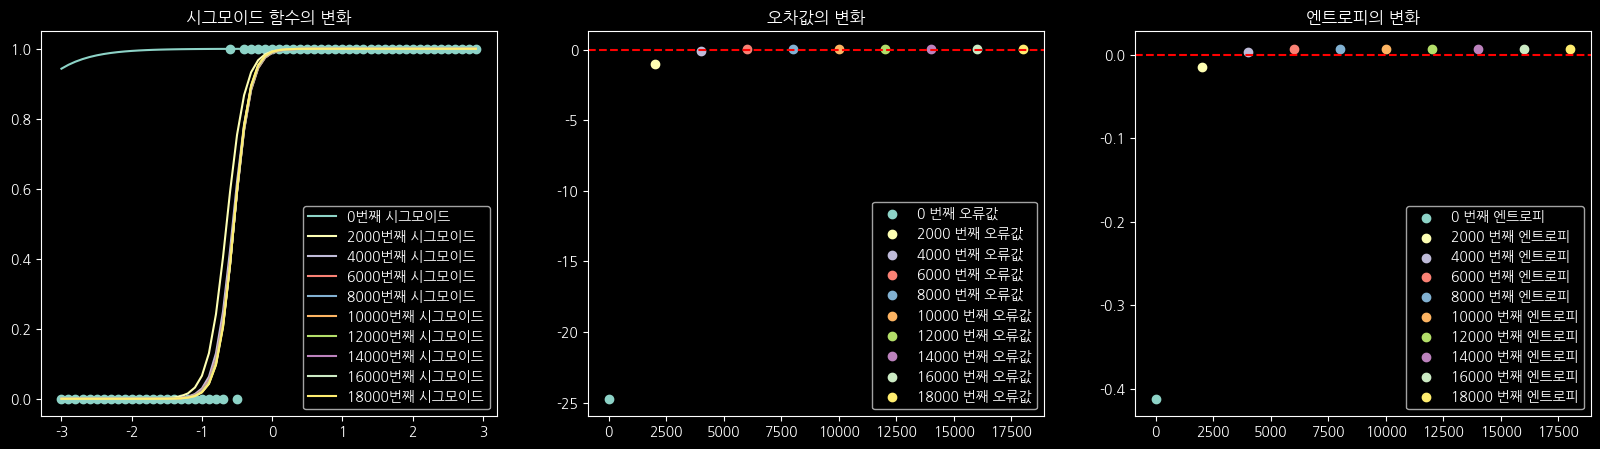

In [867]:
fig = plt.figure(figsize = [20,5])

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

n_iteration = 20000
alpha = 0.0005
theta = 10 * np.random.random(size = 2).reshape(-1,2)
cost_list = []
entropy_list = []
ax1.scatter(X,Y)
for _ in range(n_iteration):
    
    entropy = cross_entropy(X_new,Y,theta)
    entropy_list.append(entropy)
    
    predict = sigmoid(X_new@theta.T)
    
    error_str = sum(Y - predict)

    cost_list.append(error_str)
    
    cost = gradient(X_new,Y,theta)
    
    theta -= (alpha * cost).reshape(-1,2)
    
    if _ % 2000 == 0:
        print(f'하강 {_}번째')
        print(f'오차값은 : {error_str} \t 계수는 {theta}')
        ax1.plot(X,sigmoid(X_new@theta.T),label = f'{_}번째 시그모이드')
        ax2.scatter(_,error_str,label = f'{_} 번째 오류값')
        ax3.scatter(_,entropy,label = f'{_} 번째 엔트로피')
        
        
ax1.legend()
ax2.legend()
ax3.legend()
ax2.axhline(y = 0, c = 'r', ls = '--')
ax3.axhline(y = 0, c = 'r', ls = '--')
ax1.set_title('시그모이드 함수의 변화')
ax2.set_title('오차값의 변화')
ax3.set_title('엔트로피의 변화')

* 오류값이 0이 될 때 까지 theta 값을 조정해나가며 시그모이드 함수를 그려나간다.

# 정답률을 확인해보자 

* Threshold = 0.5로 지정했다.

In [835]:
predict = sigmoid(X_new@theta.T)

result = sum((predict > 0.5) == Y) / len(Y)

print('정답률은',result*100,'%')

정답률은 [96.66666667] %


# 임의로 만든 데이터에선 잘 작동하는건 알겠다. 그럼 실제 데이터에선 어떨까 ? 

* 타이타닉 급 단골 손님 iris 데이터로 분류를 해보겠다.

In [836]:
data = load_iris()

df = pd.DataFrame(data.data)

df['target'] = data.target

df = df[df['target'] != 2]

In [837]:
df 

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


* 0~3 번 칼럼은 꽃잎의 너비와 길이를 의미하고 target 값의 0 ~ 1 은 setosa, versicolor 를 의미한다.

In [838]:
df['constant'] = 1 #상수항을 미리 추가해주자 

Text(0.5, 1.0, '데이터 예시, x축은 꽃의 너비, Y축은 꽃의 종')

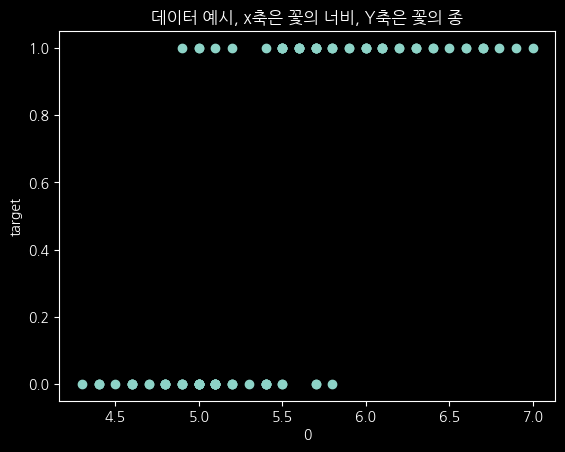

In [876]:
plt.scatter(df[0],df['target']) 
plt.xlabel('0')
plt.ylabel('target')
plt.title('데이터 예시, x축은 꽃의 너비, Y축은 꽃의 종')

* 데이터를 나눠주자 

In [839]:
feature = np.array(df[['constant',0,1,2,3]])
target = np.array(df['target']).reshape(-1,1)

하강 0번째
오차값은 : [-50.] 	 계수는 [[20.25193683 62.12042802 13.98988966 86.01137227 20.39492561]]
하강 2000번째
오차값은 : [-50.] 	 계수는 [[17.25193683 47.10242802  3.70588966 81.62537227 19.65692561]]
하강 4000번째
오차값은 : [-50.] 	 계수는 [[14.25193683 32.08442802 -6.57811034 77.23937227 18.91892561]]
하강 6000번째
오차값은 : [-50.] 	 계수는 [[ 11.25193683  17.06642802 -16.86211034  72.85337227  18.18092561]]
하강 8000번째
오차값은 : [-48.07107038] 	 계수는 [[  8.25737052   2.07484346 -27.12607473  68.4730434   17.44401235]]
하강 10000번째
오차값은 : [-5.45392469] 	 계수는 [[  7.01187731  -4.06884781 -31.21886071  66.55669852  17.11788735]]
하강 12000번째
오차값은 : [-2.03637149] 	 계수는 [[  6.82414429  -4.96870039 -31.78144873  66.25054525  17.06259401]]
하강 14000번째
오차값은 : [-1.08373763] 	 계수는 [[  6.72813845  -5.41747083 -32.06159068  66.09361788  17.03877431]]
하강 16000번째
오차값은 : [-0.45268051] 	 계수는 [[  6.68572263  -5.61654411 -32.18910664  66.02214904  17.02875079]]
하강 18000번째
오차값은 : [-0.25516287] 	 계수는 [[  6.66548109  -5.71160537 -32.25019948  65.9879

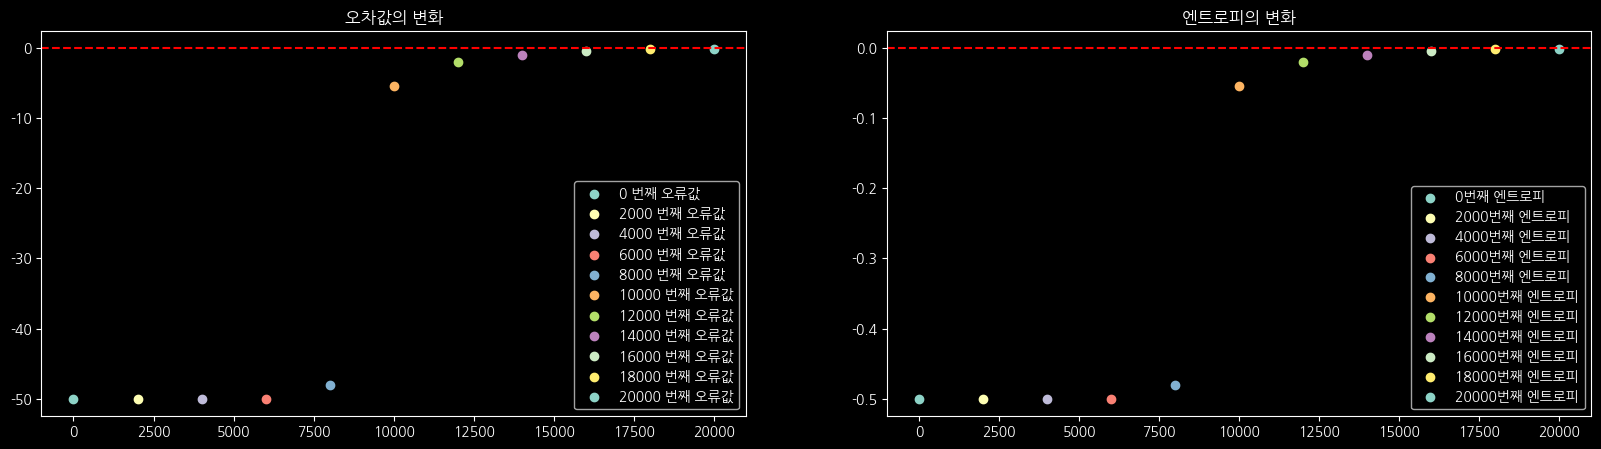

In [878]:
fig = plt.figure(figsize = [20,5])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

n_iteration = 20001
alpha = 0.00003
theta = 100 * np.random.random(size = 5).reshape(-1,5)

error_list = []
entropy_list = []
for _ in range(n_iteration):
    

    entropy = cross_entropy(feature,target,theta)
    entropy_list.append(entropy)
    predict = sigmoid(feature@theta.T)
    
    error_str = sum(target - predict)

    error_list.append(error_str)
    
    cost = gradient(feature,target,theta)
        
    theta -= (alpha * cost).reshape(-1,5)
    
    if _ % 2000 == 0:
        print(f'하강 {_}번째')
        print(f'오차값은 : {error_str} \t 계수는 {theta}')
        ax1.scatter(_,error_str,label = f'{_} 번째 오류값')
        ax2.scatter(_,entropy,label = f'{_}번째 엔트로피')
        
        
ax1.legend()
ax1.set_title('오차값의 변화')
ax1.axhline(y = 0, c = 'r', ls = '--')

ax2.legend()
ax2.set_title('엔트로피의 변화')
ax2.axhline(y = 0, c = 'r', ls = '--')

### 맨 처음 데이터의 미분값이 너무 작아 변화량이 없다가 일정 부분을 넘어서고 나서 theta 값의 업데이트가 이뤄진 것을 볼 수 있다.

### 정답률을 한 번 보자 

In [879]:
result = sigmoid(feature@theta.T) > 0.5

score = sum(result == target) / len(target)

print('정답률은 : ',score*100,'%')

정답률은 :  [100.] %


* 워낙 데이터가 분류가 잘 되는 데이터 셋이기에 정답률이 높게 나온 것으로 보인다. 